In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import uproot
import pandas as pd

In [3]:
df_MC = uproot.open('HyperTree_MC_Signal.root')['HyperTree_MC_Signal'].pandas.df()

In [4]:
df_data = uproot.open('HyperTree_Data.root')['HyperTree_Data'].pandas.df()

## Uso i tagli standard

In [5]:
df_data=df_data.astype('float')

In [6]:
hyper_df=df_data.query('NpidClustersHe3>100 and TPCnSigmaPi<3 and TPCnSigmaHe3>-2 and He3ProngPt>1.8 and ProngsDCA<0.7 and Lrec < 60 and 2.991*DistOverP<28 ')

In [7]:
hyper_df

,V0pt,TPCnSigmaHe3,DistOverP,InvMass,ArmenterosAlpha,V0CosPA,V0Chi2,PiProngPt,He3ProngPt,ProngsDCA,He3ProngPvDCA,PiProngPvDCA,NpidClustersHe3,TPCnSigmaPi,Lrec
8967,1.962140,1.75,6.648551,3.128157,0.895402,0.995340,0.0,0.282420,1.865032,0.56,0.256,0.256,121.0,-0.75,13.961224
21542,2.201268,0.75,1.439005,3.107208,0.845481,0.995776,0.0,0.228903,1.974739,0.46,0.256,0.256,150.0,0.75,3.254488
21543,2.072284,0.75,1.413225,3.000778,0.915323,0.995001,0.0,0.152766,1.974739,0.42,0.256,0.256,150.0,-2.25,3.096290
22729,3.480727,2.00,7.068511,3.022056,0.958757,0.999639,0.0,0.126212,3.407385,0.03,0.256,0.256,125.0,-2.25,24.683798
24268,1.879936,0.25,4.324229,3.086410,0.918828,0.999101,0.0,0.230197,1.800074,0.52,0.256,0.256,110.0,1.00,9.533352
27562,6.331285,-0.25,5.000340,2.988975,0.940498,0.998875,0.0,0.210619,6.132092,0.59,0.256,0.256,133.0,-2.00,34.020439
28008,3.559933,-0.75,5.908085,2.978032,0.893109,0.999747,0.0,0.247296,3.312660,0.10,0.171,0.256,141.0,-2.75,26.813217
35784,1.895450,1.75,1.935539,3.017869,0.956972,0.986463,0.0,0.117041,1.875658,0.47,0.256,0.256,148.0,2.50,3.849062
37062,1.946853,-1.00,3.662817,3.080090,0.835292,0.989362,0.0,0.266419,1.810215,0.58,0.256,0.256,137.0,-2.75,7.696677
43333,1.740909,-1.75,6.750606,3.155591,0.924527,0.982562,0.0,0.210937,1.826080,0.40,0.256,0.256,145.0,-0.75,11.933189


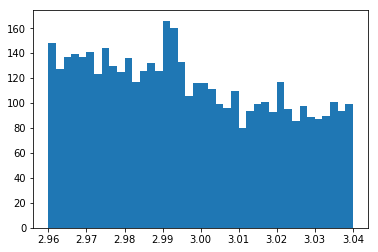

In [8]:
n,bins,_=plt.hist(hyper_df['InvMass'],bins=40,range=[2.96,3.04],histtype='barstacked');

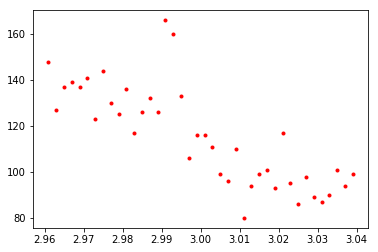

In [9]:
bin_centers = 0.5*(bins[1:]+bins[:-1])
plt.plot(bin_centers,n,'r.')

# Creo e salvo pandas per ML

In [10]:
df_Bkg = df_data.query('InvMass<2.96 or InvMass>3.04')
df_Bkg=df_Bkg[0:len(df_MC)-1]
df_Bkg['y']=0
df_MC['y']=1

In [11]:
df_ML= pd.concat([df_MC,df_Bkg])
df_ML.to_pickle('df_ML.pkl')

In [12]:
df_Sig_data=df_data.query('2.96<InvMass<3.04')

In [13]:
df_Sig_data.to_pickle('df_Sig_data.pkl')